In [1]:
# grid size

def run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p, use_gpu=False):
    print("start test ngrid = {}, n_sweep = {}, ndiv_r = {}, ndiv_t = {}, ndiv_p = {}".format(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p))

    # create simulation file by running make_test_model.py
    import os
    if (use_gpu == False):
        os.system('python3 make_test_model.py --n_rtp {} {} {} --n_sweep {} --ndiv_rtp {} {} {}'. format(n_grid, n_grid, n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p))
    else:
        os.system('python3 make_test_model.py --n_rtp {} {} {} --n_sweep {} --ndiv_rtp {} {} {} --use_gpu 1'. format(n_grid, n_grid, n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p))
 

    #
    # run simulatoin and store time file
    #
    total_nprocs = n_sweep * ndiv_r * ndiv_t * ndiv_p
    print('total number of processes: {}'.format(total_nprocs))

    # run simulation
    tomo_exec = "../../build/TOMOATT"
    mpi_path = "../../external_libs/local_mpi_hdf5/bin/"
    os.system('{}/mpirun  --use-hwthread-cpus -np {} {} -i input_params_{}-{}-{}_{}-{}-{}-{}.yml'.format(mpi_path,total_nprocs, tomo_exec, n_grid, n_grid, n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p))

    # change filename of time.txt to time_{}-{}-{}_{}-{}-{}-{}.txt
    os.system('mv time.txt time_{}-{}-{}_{}-{}-{}-{}.txt'.format(n_grid, n_grid, n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p))


In [2]:
n_grids = [10,50,100,150]

for n_grid in n_grids:
    n_sweep = 1
    ndiv_r = 1
    ndiv_t = 1
    ndiv_p = 1 
    
    run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p, use_gpu=False)
    
    n_sweep = 2
    run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p)
    
    n_sweep = 4
    run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p)
    
    n_sweep = 8
    run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p)
    
    n_sweep = 12
    run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p)


start test ngrid = 150, n_sweep = 1, ndiv_r = 1, ndiv_t = 1, ndiv_p = 1
depminmax 301.0 -29.0
1254240
total number of processes: 1
Number of threads = 1
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
min_max_dep: -29 301
min_max_lat: 28.5 51.5
min_max_lon: 13.5 41.5
n_rtp: 150 150 150
ndiv_rtp: 1 1 1
n_subprocs: 1
n_sims: 1
parameter file read done.
###### Swapping src and rec. (only regional events will be processed) ######

read input file successfully.


 Node name summary

Total number of compute nodes: 1
node name: mnagaso-Precision-5820-Tower, number: 1


my sim_rank: 0
global rank: 0, node name: mnagaso-Precision-5820-Tower | i_simul/total: 0/1, n_procs_each_sim: 1 | i_subdom/total: 0/1, subdom_main: 1, sub_rank/total: 0/1
0 assigned src id : 0 
--- IO object initialization ---
--- grid object initialization starts. ---
domain decomposition initialization end.
--- myrank: ---0
n

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


--- read model data fun from h5 file ---
--- read model data fac_a from h5 file ---
--- read model data fac_b from h5 file ---
--- read model data fac_c from h5 file ---
--- read model data fac_f from h5 file ---
size of src_list: 1
iteration 0 starting ... 
source id: 0, forward modeling starting...


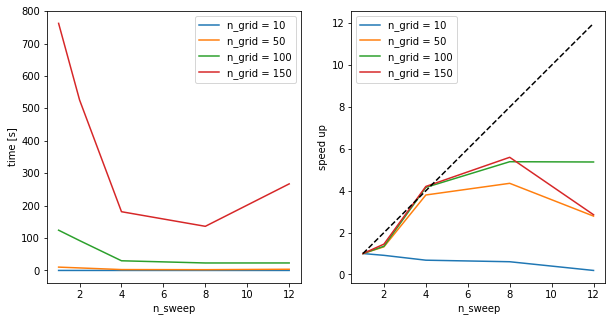

In [19]:
# read time*.txt and plot

import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted

# grep time_*.txt
import glob

def get_nsweep_and_time(num_ngrid, ndiv_p, ndiv_t, ndiv_r):

    #time_files = glob.glob('time_*.txt')
    time_files = glob.glob('time_{}-*_*-{}-{}-{}.txt'.format(num_ngrid, ndiv_p, ndiv_t, ndiv_r))
    time_files = natsorted(time_files)
    
    # read time*.txt and get parameter from filename
    n_grid = []
    n_sweep = []
    n_div   = []
    time = []
    for time_file in time_files:
        with open(time_file, 'r') as f:
            lines = f.readlines()
            time.append(float(lines[0].split(" ")[-1]))
        n_grid.append(int(time_file.split('_')[1].split('-')[0]))
        n_sweep.append(int(time_file.split('_')[2].split('-')[0]))
        ndiv_r = int(time_file.split('_')[2].split('-')[1])
        ndiv_t = int(time_file.split('_')[2].split('-')[2])
        ndiv_p = int(time_file.split('_')[2].split('-')[3].split(".")[0])

        n_div.append(ndiv_r * ndiv_t * ndiv_p)

    return n_sweep, n_div, time


nswp_10,  _, time_10 = get_nsweep_and_time(10  ,1,1,1)
nswp_50,  _, time_50 = get_nsweep_and_time(50  ,1,1,1)
nswp_100, _, time_100 = get_nsweep_and_time(100,1,1,1)
nswp_150, _, time_150 = get_nsweep_and_time(150,1,1,1)


# plot time and speed up
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(nswp_10,  np.array(time_10 ), label='n_grid = 10')
plt.plot(nswp_50,  np.array(time_50 ), label='n_grid = 50')
plt.plot(nswp_100, np.array(time_100), label='n_grid = 100')
plt.plot(nswp_150, np.array(time_150), label='n_grid = 150')
plt.xlabel('n_sweep')
plt.ylabel('time [s]')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nswp_10, time_10[0]/np.array(time_10), label='n_grid = 10')
plt.plot(nswp_50, time_50[0]/np.array(time_50), label='n_grid = 50')
plt.plot(nswp_100, time_100[0]/np.array(time_100), label='n_grid = 100')
plt.plot(nswp_150, time_150[0]/np.array(time_150), label='n_grid = 150')
plt.xlabel('n_sweep')
plt.ylabel('speed up')

# write ideal
plt.plot(n_sweep, n_sweep, 'k--')

plt.legend()


In [20]:
# test subdomain division
n_grid = 150
n_sweep = 1
ndiv_r = 1
ndiv_t = 1
ndiv_p = 1 

run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p)

ndiv_r = 2
run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p)

ndiv_t = 2
run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p)

ndiv_p = 2
run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p)

ndiv_r = 3
ndiv_t = 2
ndiv_p = 2
run_single_test(n_grid, n_sweep, ndiv_r, ndiv_t, ndiv_p)


start test ngrid = 150, n_sweep = 1, ndiv_r = 1, ndiv_t = 1, ndiv_p = 1
total number of processes: 1
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
min_max_dep: -29 301
min_max_lat: 28.5 51.5
min_max_lon: 13.5 41.5
n_rtp: 150 150 150
ndiv_rtp: 1 1 1
n_subprocs: 1
n_sims: 1
parameter file read done.
###### Swapping src and rec. (only regional events will be processed) ######

read input file successfully.


 Node name summary

Total number of compute nodes: 1
node name: mnagaso-Precision-5820-Tower, number: 1


my sim_rank: 0
global rank: 0, node name: mnagaso-Precision-5820-Tower | i_simul/total: 0/1, n_procs_each_sim: 1 | i_subdom/total: 0/1, subdom_main: 1, sub_rank/total: 0/1
0 assigned src id : 0 
--- IO object initialization ---


hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


--- grid object initialization starts. ---
domain decomposition initialization end.
--- myrank: ---0
ndiv_i j k : 1 1 1
ngrid_i j k : 150 150 150
domain_i j k: 0 0 0
loc_I J K: 150 150 150
loc_I_excl_ghost J_excl_ghost K_excl_ghost: 150 150 150
i_start_loc i_end_loc: 0 149
j_start_loc j_end_loc: 0 149
k_start_loc k_end_loc: 0 149
offset_nnodes offset_nelms: 0 0
n total local grids: 3375000   max vector elm id:  3374999
neighbors_id: -1 -1 -1 -1 -1 -1 
Memory allocation done.


 Global grid information: 


  r_min r_max dr : 6070 6400 2.21477
  depth_min depth_max dz : -29 301
  lat_min lat_max dlat [degree] : 28.5 51.5 0.154362
  lon_min lon_max dlon [degree] : 13.5 41.5 0.187919
  ngrid_i ngrid_j ngrid_k : 150 150 150




--- subdomain info ---- rank : 0


  p_loc_1d min max in deg.: 13.5 41.5
  t_loc_1d min max in deg.: 28.5 51.5
  r_loc_1d min max in km  : 6070 6400
  p_loc_1d min max in rad.: 0.235619 0.724312
  t_loc_1d min max in rad.: 0.497419 0.898845
  r_min, get_offset_k(), d

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


--- myrank: ---1
domain_i j k: 0 0 1
loc_I J K: 150 150 76
loc_I_excl_ghost J_excl_ghost K_excl_ghost: 150 150 75
i_start_loc i_end_loc: 0 149
j_start_loc j_end_loc: 0 149
k_start_loc k_end_loc: 1 75
offset_nnodes offset_nelms: 1687500 1642874
n total local grids: 1710000   max vector elm id:  1709999
neighbors_id: -1 -1 -1 -1 0 -1 
--- grid object initialization starts. ---
domain decomposition initialization end.
--- myrank: ---0
ndiv_i j k : 1 1 2
ngrid_i j k : 150 150 150
domain_i j k: 0 0 0
loc_I J K: 150 150 76
loc_I_excl_ghost J_excl_ghost K_excl_ghost: 150 150 75
i_start_loc i_end_loc: 0 149
j_start_loc j_end_loc: 0 149
k_start_loc k_end_loc: 0 74
offset_nnodes offset_nelms: 0 0
n total local grids: 1710000   max vector elm id:  1709999
neighbors_id: -1 -1 -1 -1 -1 1 
Memory allocation done.


 Global grid information: 


  r_min r_max dr : 6070 6400 2.21477
  depth_min depth_max dz : -29 301
  lat_min lat_max dlat [degree] : 28.5 51.5 0.154362
  lon_min lon_max dlon [degree] :

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


size of src_list: 1
iteration 0 starting ... 
source id: 0, forward modeling starting...
--- finalize xdmf file ---
mpi finalized.
------------------------------------------------------
end TOMOATT solver.
------------------------------------------------------
Memory deallocation done.
--- IO object finalization ---
start test ngrid = 150, n_sweep = 1, ndiv_r = 2, ndiv_t = 2, ndiv_p = 2
total number of processes: 8


hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
parameter file read done.
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
parameter file read done.
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
parameter file read done.
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
parameter file read done.
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
pa

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


mpi initialized.
------------------------------------------------------
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
parameter file read done.
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
parameter file read done.
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
parameter file read done.
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
parameter file read done.
mpi initialized.
mpi initialized.
------------------------------------------------------
start TOMOATT solver.
------------------------------------------------------
parameter file read done.
mpi initialized.
-------------------

['time_150-150-150_1-1-1-1.txt', 'time_150-150-150_1-2-1-1.txt', 'time_150-150-150_1-2-2-1.txt', 'time_150-150-150_1-2-2-2.txt', 'time_150-150-150_1-3-2-2.txt']


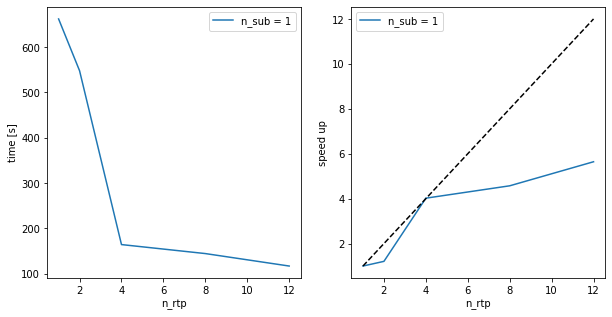

In [33]:
def get_nsub_and_time(num_ngrid):

    #time_files = glob.glob('time_*.txt')
    time_files = glob.glob('time_{}-*_1-*.txt'.format(num_ngrid))
    time_files = natsorted(time_files)
    print(time_files)
    
    # read time*.txt and get parameter from filename
    n_grid = []
    n_sweep = []
    n_div   = []
    time = []
    for time_file in time_files:
        with open(time_file, 'r') as f:
            lines = f.readlines()
            time.append(float(lines[0].split(" ")[-1]))
        n_grid.append(int(time_file.split('_')[1].split('-')[0]))
        n_sweep.append(int(time_file.split('_')[2].split('-')[0]))
        ndiv_r = int(time_file.split('_')[2].split('-')[1])
        ndiv_t = int(time_file.split('_')[2].split('-')[2])
        ndiv_p = int(time_file.split('_')[2].split('-')[3].split(".")[0])

        n_div.append(ndiv_r * ndiv_t * ndiv_p)

    return n_sweep, n_div, time




_, nsub_1, time_1 = get_nsub_and_time(150)
#_, nsub_2, time_2 = get_nsweep_and_time(150,2,1,1)
#_, nsub_4, time_4 = get_nsweep_and_time(150,2,2,1)
#_, nsub_8, time_8 = get_nsweep_and_time(150,2,2,2)
#_, nsub_12,time_12= get_nsweep_and_time(150,3,2,2)

# plot time and speed up
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(nsub_1,  np.array(time_1 ), label='n_sub = 1')
#plt.plot(nsub_2,  np.array(time_2 ), label='n_sub = 2')
#plt.plot(nsub_4,  np.array(time_4 ), label='n_sub = 4')
#plt.plot(nsub_8,  np.array(time_8 ), label='n_sub = 8')
#plt.plot(nsub_12, np.array(time_12), label='n_sub = 12')
plt.xlabel('n_rtp')
plt.ylabel ('time [s]')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nsub_1, time_1[0]/np.array(time_1), label='n_sub = 1')
#plt.plot(nsub_2, time_2[0]/np.array(time_2), label='n_sub = 2')
#plt.plot(nsub_4, time_4[0]/np.array(time_4), label='n_sub = 4')
#plt.plot(nsub_8, time_8[0]/np.array(time_8), label='n_sub = 8')
#plt.plot(nsub_12, time_12[0]/np.array(time_12), label='n_sub = 12')
plt.xlabel('n_rtp')
plt.ylabel('speed up')

# write ideal
plt.plot(nsub_1, nsub_1, 'k--')

plt.legend()



In [26]:
nsub_2

[2]